In [1]:
#파라미터 정의

Nin = 784       # number of input
Nh_1 = [100,50] # number of hidden layer 1,2
number_of_class = 10 # 1,2,3,4,5,6,7,8,9,0
Nout = number_of_class

In [6]:
#Plotting 함수 정의

import matplotlib.pyplot as plt

def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()

In [2]:
# 분류 DNN 모델 구현 ########################
from keras import layers, models

class DNN(models.Sequential):
    def __init__(self,Nin,Nh_1,Nout):
        super().__init__()
        self.add(layers.Dense(Nh_1[0], activation = 'relu',
                             input_shape = (Nin,), name = 'Hidden-1'))
        self.add(layers.Dropout(0.2))                                 #1st hidden layer, included dropout 
        
        self.add(layers.Dense(Nh_1[1],activation = 'relu', name = 'Hidden-2'))
        self.add(layers.Dropout(0.2))                                 #2nd hidden layer, included dropout 
        
        self.add(layers.Dense(Nout,activation = 'softmax'))           #output layer, softmax was used
        
        self.compile(loss = 'categorical_crossentropy',              # set compiler
                    optimizer='adam',
                    metrics=['accuracy'])

C:\Users\Administrator\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# 데이터 준비
import numpy as np
from keras import datasets
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

L, W, H = x_train.shape

x_train = x_train.reshape(-1,W*H)
x_test = x_test.reshape(-1,W*H)
x_train = x_train / 255.0
x_test = x_test / 255.0


In [5]:
# 분류 DNN 학습 및 성능 평가
model = DNN(Nin,Nh_1,Nout)
history = model.fit(x_train,y_train, epochs = 10, batch_size=100,
                   validation_split=0.2)
performance_test = model.evaluate(x_test,y_test,batch_size = 100)
print("Test Loss and Accuracy --> ",performance_test)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 50us/step - loss: 0.5253 - acc: 0.8436 - val_loss: 0.1920 - val_acc: 0.9453
Epoch 2/10
48000/48000 [==============================] - 2s 38us/step - loss: 0.2361 - acc: 0.9313 - val_loss: 0.1470 - val_acc: 0.9567
Epoch 3/10
48000/48000 [==============================] - 2s 35us/step - loss: 0.1814 - acc: 0.9473 - val_loss: 0.1204 - val_acc: 0.9651
Epoch 4/10
48000/48000 [==============================] - 2s 35us/step - loss: 0.1517 - acc: 0.9550 - val_loss: 0.1106 - val_acc: 0.9669
Epoch 5/10
48000/48000 [==============================] - 2s 35us/step - loss: 0.1330 - acc: 0.9599 - val_loss: 0.1016 - val_acc: 0.9698
Epoch 6/10
48000/48000 [==============================] - 2s 35us/step - loss: 0.1190 - acc: 0.9640 - val_loss: 0.0910 - val_acc: 0.9738
Epoch 7/10
48000/48000 [==============================] - 2s 35us/step - loss: 0.1085 - acc: 0.9668 - val_loss: 0.0922 - val_acc

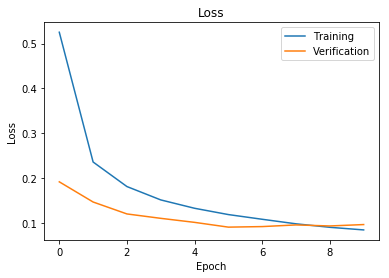

In [15]:
#plot_acc(history,'Accuracy')
plot_loss(history,'Loss')
plt.show()
